# INF200 Lecture No 9

### 2 November 2020

## Today's topics

1. Scientific Python II
    - Matplotlib
    - SciPy example: Solving differential equations
    - Data analysis I
    - Pandas

--------------

## Plotting: Matplotlib

- Currently the most widely used plotting package for scientific Python
- Many other graphics packages build on it
- See
    - https://matplotlib.org
    - https://matplotlib.org/gallery/index.html
    - http://www.labri.fr/perso/nrougier/teaching/matplotlib/
- Two different approaches
    - scripting style
    - object-oriented style
- We will look at the scripting style first

#### Configuration

- We set a quite wide and low figure format

In [65]:
import matplotlib.pyplot as plt

Set figure size to suitable format for notebook

In [66]:
plt.rcParams['figure.figsize'] = (12, 5)

##### rcParams shows all configurable parameters

In [67]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

#### Examples

##### Single function, default style

- `;` after last line to suppress output of `__repr__` of return value of last command

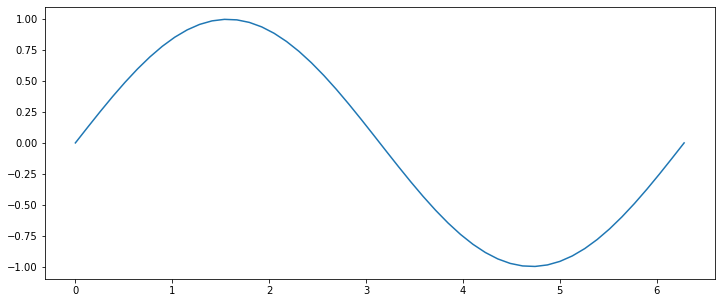

In [68]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
plt.plot(x, y);

- We can use [$\LaTeX$](http://no.wikipedia.org/wiki/LaTeX) formatting for nicer figure labels
- Strings with $\LaTeX$ codes should be raw strings, so that backslashes cause no problems

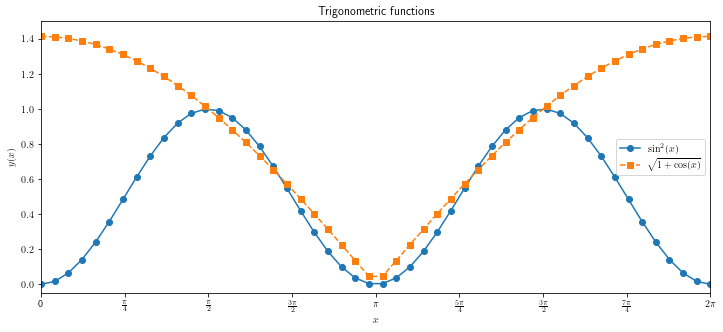

In [69]:
plt.rcParams['text.usetex'] = True

plt.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
plt.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
plt.legend();
plt.xlabel('$x$');
plt.ylabel('$y(x)$');
plt.title('Trigonometric functions');
plt.xticks(np.linspace(0, 2, 9) * np.pi,
           ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{2}$', r'$\pi$',
            r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
plt.xlim(0, 2*np.pi);
plt.ylim(-0.05, 1.5);

plt.savefig('trigfuncs.png');
plt.savefig('trigfuncs.pdf');

##### Output to file

- Generally prefer vector graphics: 'pdf', 'svg'
- In some cases raster graphics (`png`, `gif`) may be useful, but they incur a loss of quality
- `jpg` is *not* a suitable format for line graphics
- `savefig` must be called in same notebook cell as plot commands!

#### Object-oriented Matplotlib

- Generally recommended, especially in larger scripts
- Allows for more control, since we handle objects in graphic explicitly

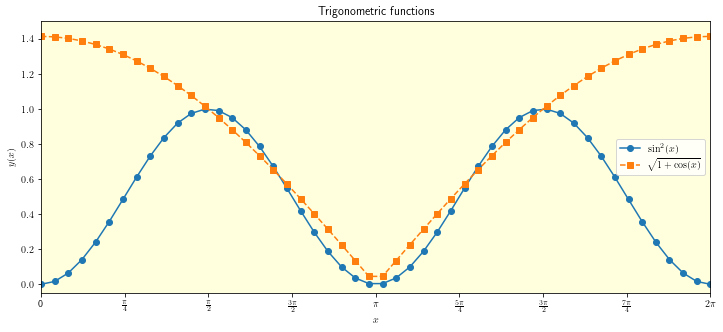

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor='#ffffdd')

line1 = ax.plot(x, np.sin(x)**2, 'o-', label=r'$\sin^2(x)$');
line2 = ax.plot(x, np.sqrt(1+np.cos(x)), 's--', label=r'$\sqrt{1+\cos(x)}$');
ax.legend();
ax.set_xlabel('$x$');
ax.set_ylabel('$y(x)$');
ax.set_title('Trigonometric functions');
ax.set_xticks(np.linspace(0, 2, 9) * np.pi)
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', 
                    r'$\frac{3\pi}{2}$', r'$\pi$', r'$\frac{5\pi}{4}$', 
                    r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']);
ax.set_xlim(0, 2*np.pi);
ax.set_ylim(-0.05, 1.5);

fig.savefig('trigfuncs_oo.pdf');

Turn off $\LaTeX$ again

In [71]:
plt.rcParams['text.usetex'] = False

### Do not trust figures blindly, evaluate them critically!

#### What is wrong with this figure?

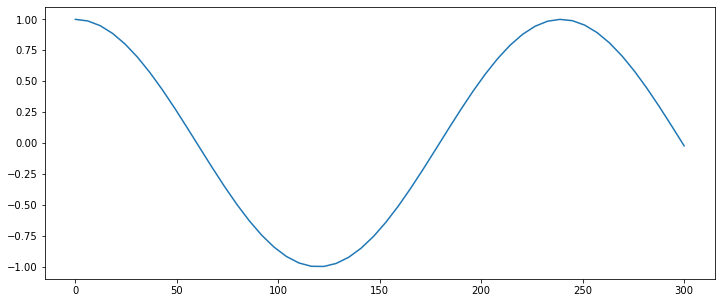

In [72]:
x = np.linspace(0, 300)
plt.plot(x, np.cos(x));

- Note the $x$-axis: it ranges from 0 to 300
- The figure thus cannot show the normal cosine, which has a period from $0$ to $2\pi$
- We plot the same function again, but with higher resolution along the $x$-axis

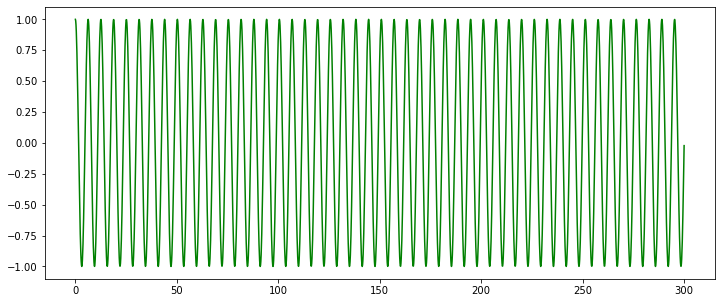

In [73]:
xh = np.linspace(0, 300, num=2000)
plt.plot(xh, np.cos(xh), 'g-');

- We see that there are very many periods of the cosine (to be precise $300/(2\pi)\approx 48$)
- `linspace(0, 300)` has given us only 50 data points along the $x$-axis
- We have drawn only **a single data point per period** in the first figure
- To see this more clearly, we plot the cosine again with few and many points, but only up to 60

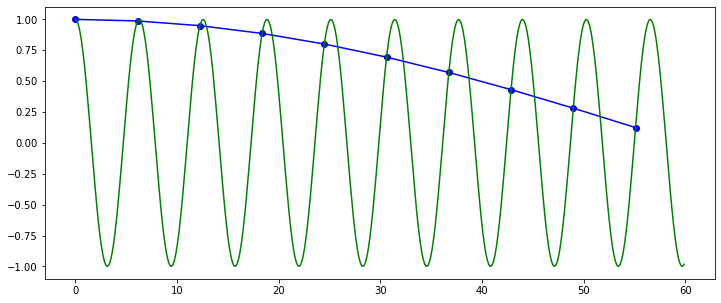

In [74]:
plt.plot(x[x<60], np.cos(x[x<60]), 'bo-')
plt.plot(xh[xh<60], np.cos(xh[xh<60]), 'g-');

In [75]:
len(x)

50

- The green line shows the correct cosine function
- The blue dots show the data points we used for plotting the first figure
- The blue line connects the blue dots and is the line we saw in the first figure

#### Take-home message: Computers are eminently suited to generate nonsense---you have to use your critical mind!!!

----------

## SciPy Example: Solving differential equations

- Simulate a three-body problem of "planets" moving according to Newton's laws
- For simplicity, we let the bodies move in the plane
- Each body is described completely by 
    - its mass $m_j$
    - its position ${\vec{r}}_j = (x_j, y_j)$
    - its velocity $\vec{v}_j = (v_{x, j}, v_{y, j})$
- The total force acting on each body is given by
$$
\vec{F}_j = -\Gamma \sum_{k=j} m_j 	\times m_k 	\times \frac{\vec{r}_j-\vec{r}_k}{\left|\vec{r}_j-\vec{r}_k
\right|^3}
$$
- The acceleration of a body is given by
$$
\vec{a}_j = \frac{\vec{F}_j}{m_j}
$$
- The change in position and velocity is given by
\begin{align}
\dot{\vec{v}}_ j &= \vec{a}_j \\
\dot{\vec{r}}_ j &= \vec{v}_j 
\end{align}

#### Implementation considerations

- SciPy supports integration of ODEs of the form
$$
\vec{y}'(t) = f(\vec{y}, t; parameters)
$$
- $\vec{y}$ is the *state vector* describing the system
- We need to combine all positions and velocities into one vector $\vec{y}$
- Example: three bodies, two dimensions
    - six coordinates (x and y for each of three bodies)
    - six velocity components
    - $\vec{y}$ has 12 dimensions

In [76]:
import scipy.integrate

#### Function computing the derivative

- Form of function prescribed by [scipy.integrate.odeint](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html)
- Set gravitational constant to 1 for convenience

In [77]:
GAMMA = 1    # gravitational constant

def f(y, t, masses):
    n_bodies = len(masses)
    n_coords = len(y) // 2
    n_dim = n_coords // n_bodies
    
    dy = np.zeros_like(y)
    dy[:n_coords] = y[n_coords:]   # velocities: r' = v
    
    r = y[:n_coords].reshape(n_bodies, n_dim) # positions
    a = np.zeros_like(r)   # accelerations
    for body in range(n_bodies):
        for other_body in range(n_bodies):
            if other_body == body:
                continue
            d = r[other_body] - r[body]
            a[body,:] += (GAMMA * masses[other_body]
                          * d * np.dot(d, d)**(-1.5))
    
    dy[n_coords:] = a.reshape(n_coords)   # accelerations: v' = a
    
    return dy

#### Euler integration

- Simplest ODE integration scheme
- Time discretized as $t_k = k \Delta t$
- Update rule
$$
\vec{y}_{k+1} = \vec{y}_k + \Delta t f(\vec{y}_k, t_k)
$$
- The function integrates the ODE from the given initial positions until tmax with time steps dt
- We assume initial velocities zero
- Returns three arrays:
    - positions `r[body, dim, time]`
    - velocities `v[body, dim, time]`
    - time

In [78]:
def planets_euler(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y = np.zeros((npoints, 2*n_coords))
    y[0, :n_coords] = r0.reshape(n_coords)
    for n in range(npoints-1):
        y[n+1, :] = y[n, :] + dt * f(y[n, :], n*dt, masses)
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Integration using `odeint` from `scipy.integrate`

- Uses advance ODE integration function
- Takes same input and returns same output as `planets_euler`

In [79]:
def planets_odeint(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y0 = np.zeros(2 * n_coords)
    y0[:n_coords] = r0.reshape(n_coords)
    y = scipy.integrate.odeint(f, y0, t, (masses,))
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Simulate example system

- Three bodies in 2-dimensional space

In [80]:
masses = np.array([5., 3., 4.])
r0 = np.array([[1., -1.], [1., 3.], [-2., -1.]])
re, ve, te = planets_euler(masses, r0, 0.001, 10)
ro, vo, to = planets_odeint(masses, r0, 0.001, 10)

#### Plot motions in plane

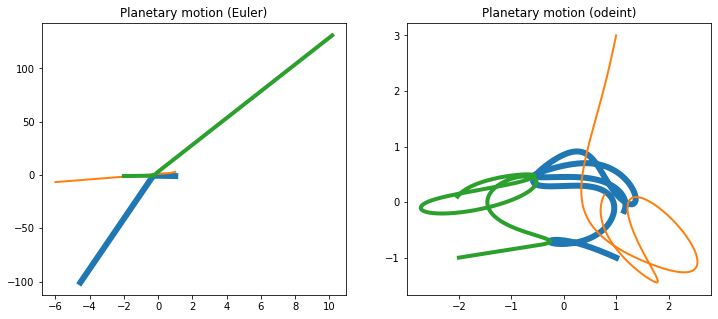

In [81]:
plt.subplot(1, 2, 1)
for ix, m in enumerate(masses):
    plt.plot(re[ix, 0,:], re[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (Euler)')

plt.subplot(1, 2, 2)
for ix, m in enumerate(masses):
    plt.plot(ro[ix, 0,:], ro[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (odeint)');

- Signficantly different
- Which one is correct?

#### Calculation of total energy in systems

In [82]:
def total_energy(r, v, masses):
    n_bodies, n_dim, n_t = r.shape
    energy = np.zeros(n_t)
    
    for n in range(n_t):
        for body in range(n_bodies):
            energy[n] = (0.5 * masses[body] 
                         * v[body, :, n].T @ v[body, :, n])

            for other_body in range(n_bodies):
                if other_body == body:
                    continue
                d = r[other_body, :, n] - r[body, : , n]
                energy[n] += (GAMMA * masses[body] * masses[other_body]
                              * (d.T @ d)**(-0.5))
    
    return energy

In [83]:
energy_e = total_energy(re, ve, masses)
energy_o = total_energy(ro, vo, masses)

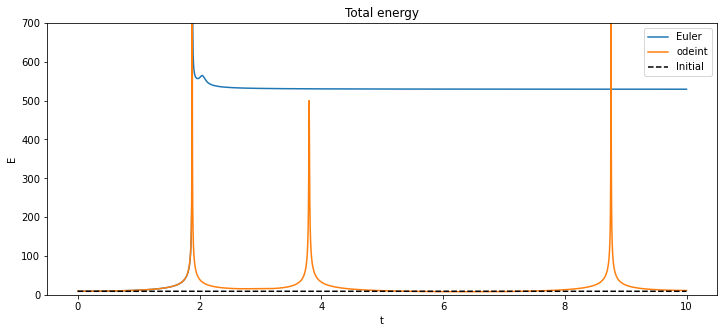

In [84]:
plt.plot(te, energy_e, label='Euler')
plt.plot(to, energy_o, label='odeint')
plt.plot(to, energy_o[0]*np.ones_like(to), 'k--', label='Initial')
plt.legend()
plt.title('Total energy')
plt.xlabel('t')
plt.ylabel('E')
plt.ylim(0, 700);

- Euler is definitely wrong
- Odeint also shows deviations, but relaxes to values much closer to the initial energy
- Odeint solution is graphically consistent with textbook solutions (Gruntz & Waldvogel in Gander & Hřebíček (eds) Problem Solving problems in scientific computing using Maple and MATLAB, Springer-Verlag, 2004, pp 51-72)

-------------------

## Data analysis I
    
### Data we will use
- Temperature and radiation data from [NMBU's weather station at Søråsfeltet](http://www.nmbu.no/fagklim/)
    - Basic Data: `Data til INF100 2003-2012.xlsx`
    - Thanks to Arne Auen Grimenes and Signe Kroken for the data!
    - The spreadsheet looks like this (one tab per year)

<img src="INF100_F05_Excel.png">    

- Note the following
    - one row per day (24 hours)
    - the first row contains column headers
    - dates are given in continental European format
    - data is missing in some cells
    - numerical values are given with decimal *comma*
- We store the spreadsheet as "csv" (*comma-separated values*) file and fix it, proceeding as follows
    1. Create a copy of the spreadsheet
    1. Delete all columns lacking data or unwanted for other reasons
    1. Save as csv-file
    1. Edit the csv-file in a text editor
        1. Add `#` to the beginning of the first line to make it a comment
        1. Use Find-Replace to replace all `,` with `.`
        1. Save the file
- I have prepared `weather_umb_2012.csv` this way
- The first few lines are

<img src="INF100_F05_CSV.png">

- While this seems like a simple thing, we will see that there are a lot of pitfalls ...

### Reading data into Python

- We can read data from a text file using NumPy's `loadtxt()`

#### First attempt

In [85]:
try:
    weather = np.loadtxt('weather_umb_2012.csv', 
                         skiprows=1,
                         delimiter=';')
except ValueError as e:
    print('Loading failed:', e)

Loading failed: 'utf-8' codec can't decode byte 0xa1 in position 25: invalid start byte


#### Second attempt

- File contains special characters
- Need to open file explicitly with proper encoding

In [86]:
try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';')
except ValueError as e:
    print('Loading failed:', e)

Loading failed: could not convert string to float: '01.01.2012'


- Problem: All entries in NumPy array need to be floats, so we can't store the date as a string

#### Third attempt

- Explicitly convert dates in column 0
- Need to convert to numbers
- The parser in `loadtxt()` returns each entry in the table as a `bytes` object
- Since `datestr2num` expects as `str` object, we need to convert `bytes` object `b` into a `str` object by decoding it

In [87]:
from matplotlib import dates

try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';',
                             converters={0: lambda b: 
                                            dates.datestr2num(b.decode('latin-1'))})
except ValueError as e:
    print('Loading failed:', e)

- It finally worked!
- Let's plot the temperatures!

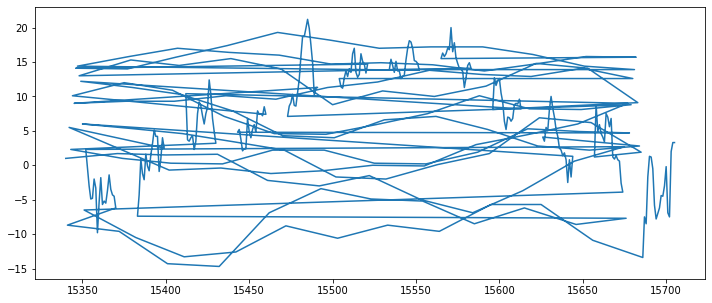

In [88]:
plt.plot(weather[:, 0], weather[:, 1]);

- This look *very* weird!
- Dates are shown as numbers around 15.500—days since 1 Jan 1970
- Jumps back and forth
- Look at first dates

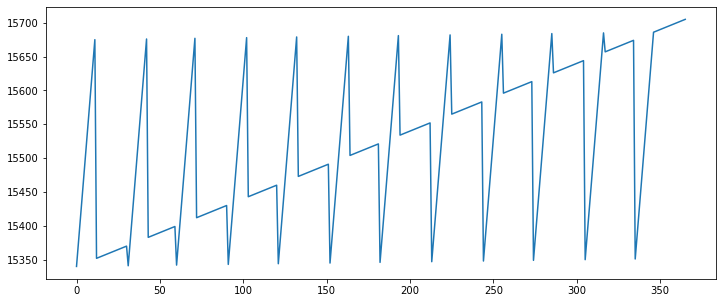

In [89]:
plt.plot(weather[:, 0]);

In [90]:
for j in range(15):
    print('{:>3d}{:>7.0f}{!s:>30s}'.format(j, weather[j, 0],
                                           dates.num2date(weather[j, 0])))

  0  15340     2012-01-01 00:00:00+00:00
  1  15371     2012-02-01 00:00:00+00:00
  2  15400     2012-03-01 00:00:00+00:00
  3  15431     2012-04-01 00:00:00+00:00
  4  15461     2012-05-01 00:00:00+00:00
  5  15492     2012-06-01 00:00:00+00:00
  6  15522     2012-07-01 00:00:00+00:00
  7  15553     2012-08-01 00:00:00+00:00
  8  15584     2012-09-01 00:00:00+00:00
  9  15614     2012-10-01 00:00:00+00:00
 10  15645     2012-11-01 00:00:00+00:00
 11  15675     2012-12-01 00:00:00+00:00
 12  15352     2012-01-13 00:00:00+00:00
 13  15353     2012-01-14 00:00:00+00:00
 14  15354     2012-01-15 00:00:00+00:00


- Dates are increasing by month first
- Only from 13 January, dates increase by day
- Conversion error from US date format!

#### Fourth attempt

- `datestr2num()` does not allow us to specify any options for date interpretation
- We need to use the underlying `dateutil.parser.parse()` function and convert result explicitly to number with `dates.date2num()`
- We call the constructor to create an object that works as a converter function
- Specify date format and file encoding as arguments

In [91]:
import dateutil

try:
    with open('weather_umb_2012.csv', mode='r', encoding='latin-1') as data:
        weather = np.loadtxt(data, 
                             skiprows=1,
                             delimiter=';',
                             converters={0: 
                    lambda b: dates.date2num(
                                dateutil.parser.parse(b.decode('latin-1'),
                                                      dayfirst=True))})
except ValueError as e:
    print('Loading failed:', e)

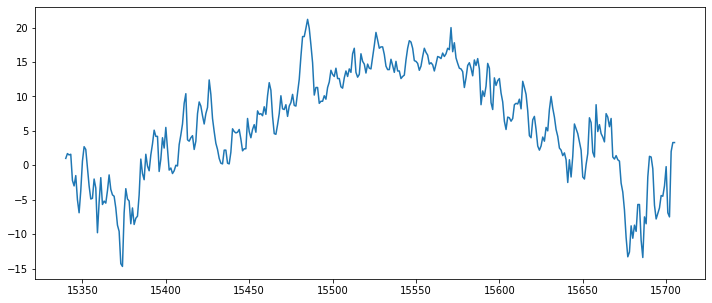

In [92]:
plt.plot(weather[:, 0], weather[:, 1]);

- Finally we have read the data in appearently correct form
- Still sensible to cross-check against data in original file!

#### Plotting with properly formatted dates

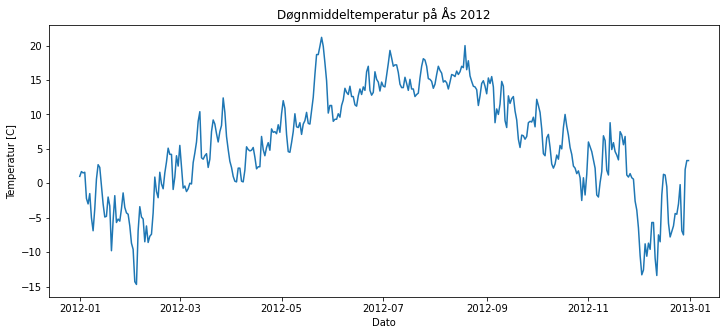

In [93]:
plt.plot_date(weather[:, 0], weather[:, 1], '-');
plt.xlabel('Dato');
plt.ylabel('Temperatur [C]');
plt.title('Døgnmiddeltemperatur på Ås 2012');

#### Summary

- We managed to import and plot the data
- Required a lot of manual work and solving multiple challenges
- Not uncommon when handling data
- We need more powerful tools!

-----------------------

## Pandas

- Powerful and widely popular package for data processing
- Developed by Wes McKinney since 2008
    - Originally geared towards applications in finance
- Resources
    - https://pandas.pydata.org
    - Chapter 12 in J.R. Johannsen's *Numerical Python*
    - [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney
- Focus on managing data
- Can be considered Python's answer to spreadsheets
- Similar to R's data frames
- Some support for data analysis and visualization

### Key concepts

- `Series`, roughly comparable to single columns in a spreadsheet
- `DataFrame`, roughly comparable to an entire table or spreadsheet

The remained of this lecture closely follows Ch 12 of Johansson's *Numerical Python*.
    

### Preparations

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (14, 4)

### Series

- One-dimensional set of data
- Defined by passing an iterable of values

In [96]:
s = pd.Series([666759, 278556, 190464, 132729])

In [97]:
s

0    666759
1    278556
2    190464
3    132729
dtype: int64

- The left column shown here is the *index* of the series
    - Pandas automatically assigned index 0, 1, 2, 3 since we did not provide and index
- The right column are the *values* of the series
- We can access index and values:


In [98]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [99]:
s.values

array([666759, 278556, 190464, 132729])

- Note that values are stored as NumPy arrays internally (Python packages build on top of each other)
- We can assign a new index to provide more information
- We can also assign a name

In [100]:
s.index = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
s.name = 'Population'
s

Oslo         666759
Bergen       278556
Trondheim    190464
Stavanger    132729
Name: Population, dtype: int64

- Much more informative!
- We could have done it in one step

In [101]:
s = pd.Series([666759, 278556, 190464, 132729],
              index=['Oslo', 'Bergen', 'Trondheim', 'Stavanger'],
              name='Population')
s

Oslo         666759
Bergen       278556
Trondheim    190464
Stavanger    132729
Name: Population, dtype: int64

- We can now access data conveniently
    - We can always use dictionary notation

In [102]:
s['Oslo']

666759

- If a name is a valid Python name, we can also look it up as an attribute

In [103]:
s.Bergen

278556

- We can even look up several entries at once
- The result is then a new series

In [104]:
s[['Oslo', 'Stavanger']]

Oslo         666759
Stavanger    132729
Name: Population, dtype: int64

In [105]:
s[:'Trondheim']

Oslo         666759
Bergen       278556
Trondheim    190464
Name: Population, dtype: int64

- We can do some data analysis

In [106]:
s.count(), s.mean(), s.std(), s.median()

(4, 317127.0, 240677.09726103977, 234510.0)

- We can get an overview easily

In [107]:
s.describe()

count         4.000000
mean     317127.000000
std      240677.097261
min      132729.000000
25%      176030.250000
50%      234510.000000
75%      375606.750000
max      666759.000000
Name: Population, dtype: float64

- We can also plot the data in various ways
- Note that we call `plot` as a method of the `Series`

In [108]:
axes

NameError: name 'axes' is not defined

In [109]:
style.capitalize()

NameError: name 'style' is not defined

/Users/plesser/opt/miniconda3/envs/inf200/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


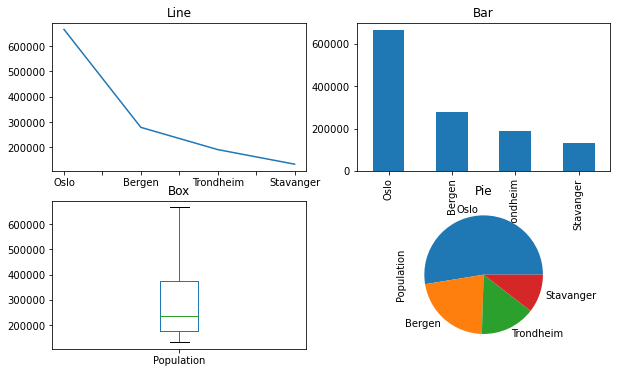

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# .ravel() turns 2x2 array into 1-dim array we need for zipping
for ax, style in zip(axes.ravel(), ['line', 'bar', 'box', 'pie']):
    s.plot(ax=ax, kind=style, title=style.capitalize())

### DataFrame

- Two-dimensional data structure
- Consists of one more Series
- Main workhorse of Pandas
- Simplest construction from 2D array

In [3]:
df = pd.DataFrame([[666759, 'Oslo'], 
                   [278556, 'Hordaland'], 
                   [190464, 'Sør-Trøndelag'],
                   [132729, 'Rogaland']])
df

0              1
0  666759           Oslo
1  278556      Hordaland
2  190464  Sør-Trøndelag
3  132729       Rogaland

- Jupyter neatly renders the DataFrame as table
- Pandas has automatically assigned numerical row index and column labels
- We can set them explictly post-construction or pass the information directly to the constructor

In [4]:
 df = pd.DataFrame([[666759, 'Oslo'], 
                   [278556, 'Hordaland'], 
                   [190464, 'Sør-Trøndelag'],
                   [132729, 'Rogaland']],
                   index=['Oslo', 'Bergen', 'Trondheim', 'Stavanger'],
                   columns=['Population', 'District'])
df

Population       District
Oslo           666759           Oslo
Bergen         278556      Hordaland
Trondheim      190464  Sør-Trøndelag
Stavanger      132729       Rogaland

- We can also pass a dictionary with one entry per column

In [5]:
df = pd.DataFrame({'Population': [666759, 278556, 190464, 132729],
                   'District': ['Oslo', 'Hordaland', 'Sør-Trøndelag', 'Rogaland']},
                  index=['Oslo', 'Bergen', 'Trondheim', 'Stavanger'])
df

Population       District
Oslo           666759           Oslo
Bergen         278556      Hordaland
Trondheim      190464  Sør-Trøndelag
Stavanger      132729       Rogaland

- We can select individual columns

In [6]:
df.District

Oslo                  Oslo
Bergen           Hordaland
Trondheim    Sør-Trøndelag
Stavanger         Rogaland
Name: District, dtype: object

In [7]:
df['District']

Oslo                  Oslo
Bergen           Hordaland
Trondheim    Sør-Trøndelag
Stavanger         Rogaland
Name: District, dtype: object

- We can select rows using `loc`
    - looks like a method, but used with brackets
    - `ix` is used in Johansson's book but is deprecated today
    

In [8]:
df.loc['Bergen']

Population       278556
District      Hordaland
Name: Bergen, dtype: object

In [9]:
df.loc['Bergen':]

Population       District
Bergen         278556      Hordaland
Trondheim      190464  Sør-Trøndelag
Stavanger      132729       Rogaland

- We can also combine row and column indexing

In [10]:
df.loc['Bergen':].Population

Bergen       278556
Trondheim    190464
Stavanger    132729
Name: Population, dtype: int64

In [11]:
df.loc['Bergen':, 'Population']

Bergen       278556
Trondheim    190464
Stavanger    132729
Name: Population, dtype: int64

- We can obtain technical information about the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Oslo to Stavanger
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   District    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


- And we can get a summary 

In [13]:
df.describe()

Population
count       4.000000
mean   317127.000000
std    240677.097261
min    132729.000000
25%    176030.250000
50%    234510.000000
75%    375606.750000
max    666759.000000

- The summary does not contain the "District" column because that is not numerical

### Working with a large dataset

- File `ssb_01223_folketall_20171113.csv` contains information about the population in Norwegian municipalities obtained from https://www.ssb.no/folkemengde#relatert-tabell-3

#### Inspecting the file

- The Unix `file` command tells us what kind of file we have (may not work on Windows)

In [15]:
!file ssb_01223_folketall_20171113.csv

ssb_01223_folketall_20171113.csv: UTF-8 Unicode (with BOM) text, with CR line terminators


- Let's try reading the file using Python

In [16]:
with open('ssb_01223_folketall_20171113.csv', 'r') as dfile:
    dtext = dfile.readlines()

In [17]:
len(dtext)

467

- Ok, fits roughly with 400+ municipalities in Norway (2017)
- Let's look at the first few lines

In [18]:
for lnum, line in enumerate(dtext[:10]):
    print(f'{lnum:04d}:',line.strip())

0000: ﻿;Folketalet 1. januar;Fødde;Døde;Fødselsoverskot;Innflyttingar;Innflyttingar;Utflyttingar;Utflyttingar;Nettoinnflytting;Folkevekst;Folketalet ved utgangen av kvartalet;
0001: I alt;Av dette fra utlandet;I alt;Av dette til utlandet;
0002: 0 Hele landet;5258317;28779;20990;7789;27687;27687;16031;16031;11656;19445;5277762;
0003: ;;;;;;;;;;;;
0004: 01 Østfold;292893;1401;1292;109;4768;1016;3576;681;1192;1301;294194;
0005: 0101 Halden;30790;164;139;25;587;121;562;66;25;50;30840;
0006: 0104 Moss;32407;123;152;-29;1092;146;929;93;163;134;32541;
0007: 0105 Sarpsborg;55127;294;270;24;1306;173;1123;111;183;207;55334;
0008: 0106 Fredrikstad;80121;401;357;44;1946;253;1575;180;371;415;80536;
0009: 0111 Hvaler;4517;12;20;-8;170;10;156;6;14;6;4523;


- It seems that we have a mix of data for nation, district and municipalities
- We have two header lines
- We have empty lines
- Probably need to simplify data to be able to read it properly
- Idea
    - Use regular expressions to help us filter data
    - Create one file containing only numbers and names of districts (two-digit numbers)
    - Create second file containing only data for municipalities, keeping only the total population, births and deaths

In [19]:
import re

#### List of districts

- `^([012][0-9])` matches all two-digit numbers beginning with 0, 1, or 2 and stores the match in a group
- `(\S[\S ]*?);` matches a character followed by more characters or whitespace, followed by a semicolon
    - all except the semicolon is put in a group and stored
    - the `?` makes the `*` *non-greedy*, i.e., it stops at the first semicolon

0004: 01 Østfold;292893;1401;1292;109;4768;1016;3576;681;1192;1301;294194;

In [20]:
with open('norway_districts.csv', 'w') as distfile:
    distfile.write('Number;Name\n')
    for line in dtext:
        m = re.search(r'^([012][0-9]) (\S[\S ]*?);', line)
        if m:
            distfile.write('{};{}\n'.format(*(m.groups())))

In [21]:
!cat norway_districts.csv

Number;Name
01;Østfold
02;Akershus
03;Oslo
04;Hedmark
05;Oppland
06;Buskerud
07;Vestfold
08;Telemark
09;Aust-Agder
10;Vest-Agder
11;Rogaland
12;Hordaland
14;Sogn og Fjordane
15;Møre og Romsdal
16;Sør-Trøndelag
17;Nord-Trøndelag
18;Nordland
19;Troms - Romsa
20;Finnmark - Finnmárku


#### List of municipalities

- `^([012][0-9]{3})` matches four-digit numbers beginning with 0, 1, 2 at the beginning of a line and puts them in a group
- `(\d+)` matches a number with at least one digit followed by semicolon and puts it in a group

In [22]:
with open('norway_muni_pop_2017_K2.csv', 'w') as munis:
    munis.write('Number;Name;Population;Births;Deaths\n')
    for line in dtext:
        m = re.search(r'^([012][0-9]{3}) (\S[\S ]*?);(\d+);(\d+);(\d+);', line)
        if m:
            munis.write(('{}'+';{}'*4+'\n').format(*(m.groups())))

In [23]:
!head -n 5 norway_muni_pop_2017_K2.csv

Number;Name;Population;Births;Deaths
0101;Halden;30790;164;139
0104;Moss;32407;123;152
0105;Sarpsborg;55127;294;270
0106;Fredrikstad;80121;401;357


#### Loading the data

- Pandas has powerful tools for reading from various input files
- District and municipality numbers are not numerical numbers but symbols
    - Tell Pandas not to convert them on import

In [24]:
districts = pd.read_csv('norway_districts.csv', sep=';', 
                        dtype={'Number': str})

In [25]:
districts.head()

Number      Name
0     01   Østfold
1     02  Akershus
2     03      Oslo
3     04   Hedmark
4     05   Oppland

In [26]:
munis = pd.read_csv('norway_muni_pop_2017_K2.csv', sep=';', 
                    dtype={'Number': str})

In [27]:
munis.head()

Number         Name  Population  Births  Deaths
0   0101       Halden       30790     164     139
1   0104         Moss       32407     123     152
2   0105    Sarpsborg       55127     294     270
3   0106  Fredrikstad       80121     401     357
4   0111       Hvaler        4517      12      20

- Let's get a little statistics

In [28]:
munis.describe()

Population       Births      Deaths
count     426.000000   426.000000   426.00000
mean    12343.467136    67.556338    49.27230
std     38519.706281   262.431038   123.24062
min       201.000000     0.000000     0.00000
25%      2159.250000     8.000000    11.00000
50%      4684.500000    22.000000    23.00000
75%     10831.750000    58.750000    43.00000
max    666759.000000  4816.000000  1995.00000

### Joining data from two tables

- We would like to add the district name to the municipality table
- As a first step, we add the district number to the municipality table
    - The first two digits of the municipality number are the district number
- `apply()`  allows us to apply a function to a column

In [29]:
munis.Number.apply(lambda s: s[:2]).head()

0    01
1    01
2    01
3    01
4    01
Name: Number, dtype: object

- We can now add a new column
    - When adding a new column, we must use dict-style notation on the left-hand side

In [30]:
munis['DNumber'] = munis.Number.apply(lambda s: s[:2])

In [31]:
munis.head()

Number         Name  Population  Births  Deaths DNumber
0   0101       Halden       30790     164     139      01
1   0104         Moss       32407     123     152      01
2   0105    Sarpsborg       55127     294     270      01
3   0106  Fredrikstad       80121     401     357      01
4   0111       Hvaler        4517      12      20      01

In [32]:
munis.tail()

Number               Name  Population  Births  Deaths DNumber
421   2024           Berlevåg         991       3       7      20
422   2025      Deatnu - Tana        2911      11      19      20
423   2027  Unjárga - Nesseby         951       3       7      20
424   2028          Båtsfjord        2267      10      10      20
425   2030       Sør-Varanger       10199      41      54      20

- For clarity, we rename the `Number` column to `MNumber`
- We also change `Name` to `Municipality`

In [33]:
munis = munis.rename(columns={'Number': 'MNumber', 'Name': 'Municipality'})
munis.head()

MNumber Municipality  Population  Births  Deaths DNumber
0    0101       Halden       30790     164     139      01
1    0104         Moss       32407     123     152      01
2    0105    Sarpsborg       55127     294     270      01
3    0106  Fredrikstad       80121     401     357      01
4    0111       Hvaler        4517      12      20      01

- We can now *merge* the municipality and the district dataframes
- We need to select (at least) one column to *merge on*: rows with equal values will be matched
- Since we have different column names for the district number in the two dataframes, we need to specify `left_on` and `right_on`
- See also http://pandas.pydata.org/pandas-docs/stable/merging.html


In [34]:
munis2 = munis.merge(districts, left_on='DNumber', right_on='Number')

In [35]:
munis2.shape

(426, 8)

- We still have all 426 rows, no column has been lost (might have happened if a municipality had a district number not in the districts table)
- As a check, look at each 40th entry
- `iloc` is indexed lookup

In [36]:
munis2.iloc[::40]

MNumber  Municipality  Population  Births  Deaths DNumber Number  \
0      0101        Halden       30790     164     139      01     01   
40     0301  Oslo kommune      666759    4816    1995      03     03   
80     0534          Gran       13707      61      81      05     05   
120    0723         Tjøme        4928      18      22      07     07   
160    1017     Songdalen        6568      46      24      10     10   
200    1221         Stord       18821     126      60      12     12   
240    1424         Årdal        5363      23      26      14     14   
280    1548         Fræna        9741      54      37      15     15   
320    1717        Frosta        2630      14      17      17     17   
360    1838     Gildeskål        2024       7      20      18     18   
400    1936       Karlsøy        2273      16      16      19     19   

                 Name  
0             Østfold  
40               Oslo  
80            Oppland  
120          Vestfold  
160        Vest-Agder  
200         Hordaland  
240  Sogn og Fjordane  
280   Møre og Romsdal  
320    Nord-Trøndelag  
360          Nordland  
400     Troms - Romsa

- Looks good, but some clean-up to do: remove municipality and district numbers
    - Axis 1 are columns
- Also need to rename `Name` to `District`

In [37]:
munis3 = munis2.drop(labels=['MNumber', 'DNumber', 'Number'], axis=1)
munis3 = munis3.rename(columns={'Name': 'District'})
munis3.head()

Municipality  Population  Births  Deaths District
0       Halden       30790     164     139  Østfold
1         Moss       32407     123     152  Østfold
2    Sarpsborg       55127     294     270  Østfold
3  Fredrikstad       80121     401     357  Østfold
4       Hvaler        4517      12      20  Østfold

### Exploring the data

In [38]:
munis3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipality  426 non-null    object
 1   Population    426 non-null    int64 
 2   Births        426 non-null    int64 
 3   Deaths        426 non-null    int64 
 4   District      426 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.0+ KB


In [39]:
munis3.describe()

Population       Births      Deaths
count     426.000000   426.000000   426.00000
mean    12343.467136    67.556338    49.27230
std     38519.706281   262.431038   123.24062
min       201.000000     0.000000     0.00000
25%      2159.250000     8.000000    11.00000
50%      4684.500000    22.000000    23.00000
75%     10831.750000    58.750000    43.00000
max    666759.000000  4816.000000  1995.00000

- Index by municipality and sort by index

In [40]:
munis4 = munis3.set_index('Municipality').sort_index()
munis4.head()

Population  Births  Deaths              District
Municipality                                                  
Agdenes             1711       5      12         Sør-Trøndelag
Alstahaug           7428      33      34              Nordland
Alta               20446     121      79  Finnmark - Finnmárku
Alvdal              2441      15      15               Hedmark
Andøy               4908      30      21              Nordland

In [41]:
munis4.tail()

Population  Births  Deaths   District
Municipality                                        
Østre Toten         14887      70      82    Oppland
Øvre Eiker          18562      97      85   Buskerud
Øyer                 5082      24      25    Oppland
Øygarden             4913      29      13  Hordaland
Øystre Slidre        3248      16      12    Oppland

#### Hierarchical indexing

- We can create an index with several components
- Entries are then grouped
- We also sort by district

In [42]:
munis5 = munis3.set_index(['District', 'Municipality']).sort_index(level=0)
munis5.head(40)

Population  Births  Deaths
District   Municipality                               
Akershus   Asker                 60781     299     207
           Aurskog-Høland        16162      90      81
           Bærum                124008     680     445
           Eidsvoll              24415     134      87
           Enebakk               10927      49      23
           Fet                   11555      53      39
           Frogn                 15743      61      71
           Gjerdrum               6546      34      21
           Hurdal                 2910      19      16
           Lørenskog             37406     222     121
           Nannestad             12657      70      34
           Nes (Ak.)             21241     126      92
           Nesodden              18869      70      68
           Nittedal              23213     117      59
           Oppegård              26988     134      79
           Rælingen              17730     113      53
           Skedsmo               53276     291     216
           Ski                   30698     144     101
           Sørum                 17665      85      40
           Ullensaker            35102     209     104
           Vestby                17188      77      52
           Ås                    19288     110      59
Aust-Agder Arendal               44576     206     202
           Birkenes               5178      33      15
           Bygland                1200       6       3
           Bykle                   952       6       3
           Evje og Hornnes        3614      20      18
           Froland                5713      26      25
           Gjerstad               2511       8      16
           Grimstad              22692     128      78
           Iveland                1342       8       4
           Lillesand             10702      56      35
           Risør                  6936      24      43
           Tvedestrand            6051      23      29
           Valle                  1246       4       7
           Vegårshei              2104      11       9
           Åmli                   1856       8       9
Buskerud   Drammen               68363     352     272
           Flesberg               2696      16      15
           Flå                    1081       4      15

- Look up one district

In [43]:
munis5.loc['Rogaland']

Population  Births  Deaths
Municipality                            
Bjerkreim           2826      23       8
Bokn                 855       7       2
Eigersund          14899      78      56
Finnøy              3235      26      10
Forsand             1245       4       7
Gjesdal            11902      87      33
Haugesund          37166     220     159
Hjelmeland          2708      16       9
Hå                 18800     151      61
Karmøy             42229     220     165
Klepp              19042     120      43
Kvitsøy              534       3       1
Lund                3259      21      13
Randaberg          10873      60      36
Rennesøy            4892      27      10
Sandnes            75497     524     214
Sauda               4760      22      26
Sokndal             3316      19      20
Sola               26016     174      61
Stavanger         132729     834     456
Strand             12662      74      38
Suldal              3853      20      15
Time               18656     134      55
Tysvær             11041      66      31
Utsira               201       1       0
Vindafjord          8828      57      44

- Look up a particular municipality with hierarchical index
    - Argument *must* be *tuple*, not list

In [46]:
munis5.loc[('Akershus', 'Ås')]

Population    19288
Births          110
Deaths           59
Name: (Akershus, Ås), dtype: int64

- Sort by population

In [47]:
munis4.sort_values('Population', ascending=False).head()

Population  Births  Deaths       District
Municipality                                           
Oslo kommune      666759    4816    1995           Oslo
Bergen            278556    1597    1012      Hordaland
Trondheim         190464    1142     645  Sør-Trøndelag
Stavanger         132729     834     456       Rogaland
Bærum             124008     680     445       Akershus

- Count the number of municipalities in each district
    - Count how often each district name occurs in the `District` column
- Sort result alphabetically

In [48]:
munis4.District.value_counts().sort_index()

Akershus                22
Aust-Agder              15
Buskerud                21
Finnmark - Finnmárku    19
Hedmark                 22
Hordaland               33
Møre og Romsdal         36
Nord-Trøndelag          23
Nordland                44
Oppland                 26
Oslo                     1
Rogaland                26
Sogn og Fjordane        26
Sør-Trøndelag           25
Telemark                18
Troms - Romsa           24
Vest-Agder              15
Vestfold                12
Østfold                 18
Name: District, dtype: int64

#### Grouping

- Using grouping, we can aggregate data across a group
- Here we will aggregate at the district level
    - total population
    - median population per municipality
    - number of municipalities
- We first apply `groupby()` to perform the grouping, then an aggregation operation
- See also https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [49]:
district_median = munis4.groupby('District').median()
district_total = munis4.groupby('District').sum()
district_munis = munis4.groupby('District').count()
district_median

Population  Births  Deaths
District                                        
Akershus                 19078.5   111.5    69.5
Aust-Agder                3614.0    20.0    16.0
Buskerud                  4719.0    27.0    30.0
Finnmark - Finnmárku      2267.0     8.0    11.0
Hedmark                   5342.0    19.5    37.0
Hordaland                 5128.0    24.0    20.0
Møre og Romsdal           4926.0    24.0    22.0
Nord-Trøndelag            2515.0    12.0    17.0
Nordland                  2035.5     7.5    12.0
Oppland                   5399.5    20.0    29.0
Oslo                    666759.0  4816.0  1995.0
Rogaland                  9850.5    58.5    32.0
Sogn og Fjordane          3007.5    13.0    17.5
Sør-Trøndelag             4822.0    23.0    26.0
Telemark                  4225.5    14.0    27.0
Troms - Romsa             2574.5     9.5    14.0
Vest-Agder                6568.0    40.0    30.0
Vestfold                 10178.5    54.0    49.5
Østfold                   6581.5    35.5    30.0

In [155]:
district_total.sort_values('Population', ascending=False)

Population  Births  Deaths
District                                        
Oslo                      666759    4816    1995
Akershus                  604368    3187    2068
Hordaland                 519963    2984    1894
Rogaland                  472024    2988    1573
Sør-Trøndelag             317363    1801    1220
Østfold                   292893    1401    1292
Buskerud                  279714    1379    1241
Møre og Romsdal           266274    1408    1159
Vestfold                  247048    1152    1041
Nordland                  242866    1160    1172
Hedmark                   196190     858    1097
Oppland                   189479     810     980
Vest-Agder                184116    1053     736
Telemark                  173307     777     876
Troms - Romsa             165632     836     669
Nord-Trøndelag            137233     686     651
Aust-Agder                116673     567     496
Sogn og Fjordane          110266     549     473
Finnmark - Finnmárku       76149     367     357

In [156]:
district_munis

Population  Births  Deaths
District                                        
Akershus                      22      22      22
Aust-Agder                    15      15      15
Buskerud                      21      21      21
Finnmark - Finnmárku          19      19      19
Hedmark                       22      22      22
Hordaland                     33      33      33
Møre og Romsdal               36      36      36
Nord-Trøndelag                23      23      23
Nordland                      44      44      44
Oppland                       26      26      26
Oslo                           1       1       1
Rogaland                      26      26      26
Sogn og Fjordane              26      26      26
Sør-Trøndelag                 25      25      25
Telemark                      18      18      18
Troms - Romsa                 24      24      24
Vest-Agder                    15      15      15
Vestfold                      12      12      12
Østfold                       18      18      18

- And we can plot
- For more on indexing, see https://pandas.pydata.org/pandas-docs/stable/indexing.html

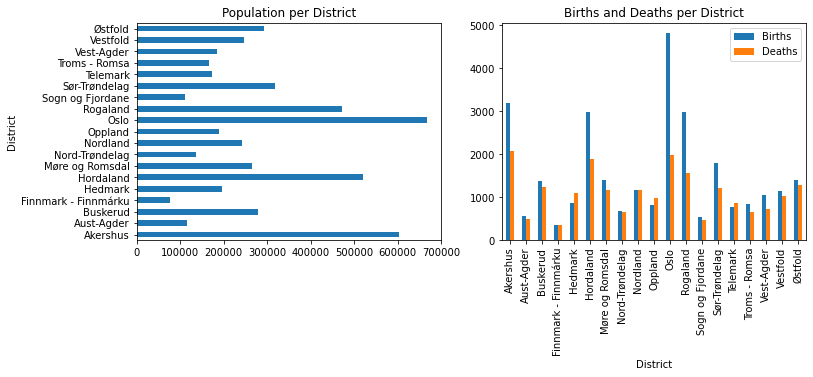

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
district_total.Population.plot(kind='barh', ax=ax1)
ax1.set_title('Population per District')
district_total.loc[:, 'Births':'Deaths'].plot(ax=ax2, kind='bar', 
                                              title='Births and Deaths per District');

- We can also calculate with series
- Compute difference between births and deaths relative to population
    - Population is per 1 Jan 2017
    - Births and deaths are for the first half of 2017
    - Population also changes by people moving in and out, not included here    

In [51]:
birth_surplus = district_total.Births - district_total.Deaths
rel_birth_surplus = birth_surplus / district_total.Population
rel_birth_surplus

District
Akershus                0.001852
Aust-Agder              0.000609
Buskerud                0.000493
Finnmark - Finnmárku    0.000131
Hedmark                -0.001218
Hordaland               0.002096
Møre og Romsdal         0.000935
Nord-Trøndelag          0.000255
Nordland               -0.000049
Oppland                -0.000897
Oslo                    0.004231
Rogaland                0.002998
Sogn og Fjordane        0.000689
Sør-Trøndelag           0.001831
Telemark               -0.000571
Troms - Romsa           0.001008
Vest-Agder              0.001722
Vestfold                0.000449
Østfold                 0.000372
dtype: float64

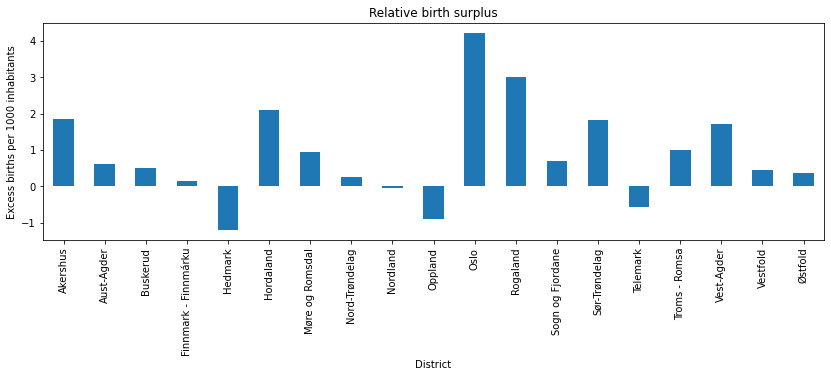

In [52]:
(rel_birth_surplus*1000).plot(kind='bar', title='Relative birth surplus');
plt.ylabel('Excess births per 1000 inhabitants');

- For more on Pandas plotting, see https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Statistical plots with Seaborn Graphics Library

- https://seaborn.pydata.org
- Graphics library for statistical plots
- Builds on top of Matplotlib
- Easily usable with Pandas dataframes

In [53]:
import seaborn as sns

- Create plot showing distribution of populations

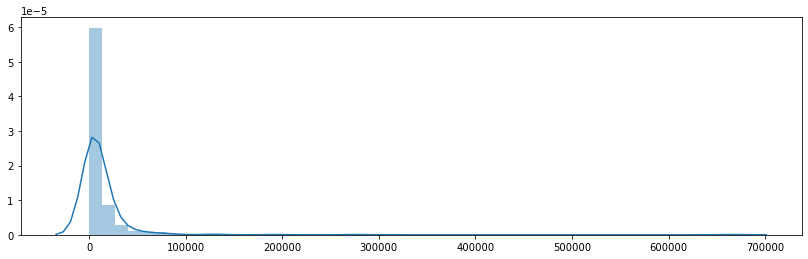

In [54]:
sns.distplot(munis4.Population.values, bins=50);

- Not too useful: the big cities get in the way
- Plot only for smaller municipalities

In [55]:
msmall = munis4.loc[munis4.Population < 100000]

- In the line above, we use a logical array as indexing mask

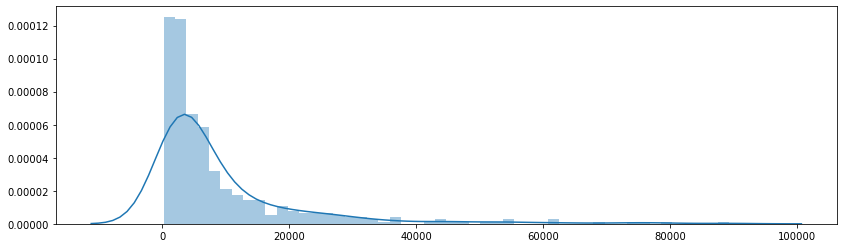

In [56]:
sns.distplot(msmall.Population.values, bins=50);

- The plot function created a histogram and estimated a distribution

#### Two-dimensional distributions

- Let's look at correlations between births and deaths
    - Stick to the small municipality sample

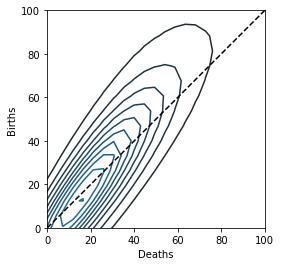

In [58]:
sns.kdeplot(msmall.Deaths, msmall.Births, shade=False);
plt.plot([0, 100], [0, 100], 'k--');
plt.xlim([0, 100]);
plt.ylim([0,100]);
plt.gca().set_aspect('equal');

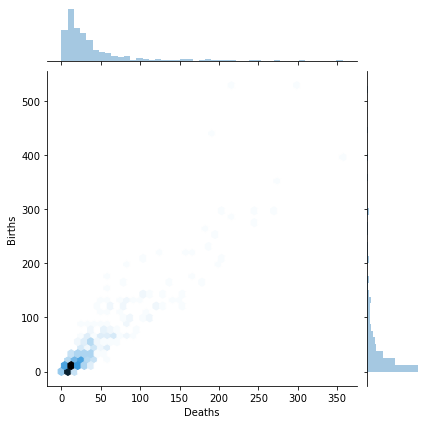

In [59]:
sns.jointplot(msmall.Deaths, msmall.Births, kind='hex');

## Time series in Pandas

This section is based on Ch 12 of [Johansson's *Numerical Python*](http://jrjohansson.github.io/numericalpython.html).

- We will look at data with a time dimension: Weather data from the meteorological station at NMBU from 2003–2012
- Data is available as Excel document `Aas dogn 2003-2012.xlsx`
    - Thanks to Signe Kroken and Arne Grimenes for providing the data!
    - Spreadsheet with one sheet per year
- Handling times and especially dates is difficult
    - Many different formats
    - Leap years
    - Different calendars
    - Calculation of differences in dates not trivial
    - Time zones
    - Summer/Winter time
- Python and Pandas each has its own component for handling dates and times
    - Python: `datetime`, $\mu\text{s}$ resolution
    - Pandas: `Timestamp`, $\text{ns}$ resolution
    - Can be converted into each other

### Times and Dates in Pandas

#### Timestamps

- We can generate time stamps from different date and time formats
- If we do not specify a time, midnight is default

In [60]:
print(pd.Timestamp('2017-11-20'))
print(pd.Timestamp('20/11/2017'))
print(pd.Timestamp('20.11.17'))
print(pd.Timestamp('20 Nov 17'))
print(pd.Timestamp('Nov 20 17'))

2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00


- Beware of US date format!

In [61]:
print(pd.Timestamp('04.11.17'))
print(pd.Timestamp('04/11/17'))
print(pd.Timestamp('14.11.17'))
print(pd.Timestamp('14/11/17'))

2017-04-11 00:00:00
2017-04-11 00:00:00
2017-11-14 00:00:00
2017-11-14 00:00:00


- We cannot create timestamps for non-existing dates

In [63]:
try:
    print(pd.Timestamp('29 Feb 2017'))
except ValueError as e:
    print(e)

could not convert string to Timestamp


- Stamps with times add "today" as default

In [64]:
print(pd.Timestamp('10:30'))
print(pd.Timestamp('09 Nov 2020 10:30'))

2020-11-09 10:30:00
2020-11-09 10:30:00


- We can specify a timezone
- And convert to other timezone

In [65]:
print(pd.Timestamp('10:30', tz='Europe/Oslo'))
print(pd.Timestamp('10:30', tz='Europe/Oslo').tz_convert('UTC'))

2020-11-09 10:30:00+01:00
2020-11-09 09:30:00+00:00


- Differences of `Timestamp`s are `Timedelta` objects

In [66]:
d = pd.Timestamp('2017-11-16 16:00') - pd.Timestamp('2017-09-08 08:15')
print(d)
print(d.total_seconds())

69 days 07:45:00
5989500.0


In [74]:
d = pd.Timestamp('2017-11-16 16:00', tz='Europe/Oslo') - pd.Timestamp('2017-09-08 08:15', 
                                                                      tz='Europe/Oslo')
print(d)
print(d.total_seconds())

69 days 08:45:00
5993100.0


#### Date ranges

- We can easily generate date ranges
- Data ranges are of type `DatetimeIndex`,  since they are mostly used as indices
- Some examples

In [67]:
pd.date_range('2017-11-20', periods=10)

DatetimeIndex(['2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27',
               '2017-11-28', '2017-11-29'],
              dtype='datetime64[ns]', freq='D')

- `date_range()` knows about leap years

In [68]:
pd.date_range('2016-02-27', periods=4)

DatetimeIndex(['2016-02-27', '2016-02-28', '2016-02-29', '2016-03-01'], dtype='datetime64[ns]', freq='D')

- We can specify start and end date, both are included

In [69]:
pd.date_range('2017-12-30', '2018-01-02')

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02'], dtype='datetime64[ns]', freq='D')

- We can specify different intervals and times as well

In [70]:
pd.date_range('2017-11-20 10:00', '2017-11-20 14:00', freq='H')

DatetimeIndex(['2017-11-20 10:00:00', '2017-11-20 11:00:00',
               '2017-11-20 12:00:00', '2017-11-20 13:00:00',
               '2017-11-20 14:00:00'],
              dtype='datetime64[ns]', freq='H')

In [71]:
pd.date_range('2017-11-20 10:00', '2017-11-20 11:00', freq='15min')

DatetimeIndex(['2017-11-20 10:00:00', '2017-11-20 10:15:00',
               '2017-11-20 10:30:00', '2017-11-20 10:45:00',
               '2017-11-20 11:00:00'],
              dtype='datetime64[ns]', freq='15T')

- `data_range()` knows about business days (sort of)

In [72]:
pd.date_range('2017-11-20', '2017-11-28', freq='B')

DatetimeIndex(['2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-27', '2017-11-28'],
              dtype='datetime64[ns]', freq='B')

- `date_range()` even knows about summer and winter time (if we provide a timezone)

In [73]:
pd.date_range('2017-10-29 01:00', '2017-10-29 04:00', freq='30min', tz='Europe/Oslo')

DatetimeIndex(['2017-10-29 01:00:00+02:00', '2017-10-29 01:30:00+02:00',
               '2017-10-29 02:00:00+02:00', '2017-10-29 02:30:00+02:00',
               '2017-10-29 02:00:00+01:00', '2017-10-29 02:30:00+01:00',
               '2017-10-29 03:00:00+01:00', '2017-10-29 03:30:00+01:00',
               '2017-10-29 04:00:00+01:00'],
              dtype='datetime64[ns, Europe/Oslo]', freq='30T')

- We can extract information about weekdays, calendar weeks, and similar

In [75]:
dr = pd.date_range('2017-11-20', '2017-11-26')
print(dr.weekday)
print(dr.day_name())
print(dr.isocalendar().week)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')
2017-11-20    47
2017-11-21    47
2017-11-22    47
2017-11-23    47
2017-11-24    47
2017-11-25    47
2017-11-26    47
Freq: D, Name: week, dtype: UInt32


- Calendar week can be problematic at beginning and end of year

In [76]:
pd.date_range('2016-01-01', '2016-12-31').isocalendar().week.value_counts().sort_index().loc[51:]

51    7
52    6
53    3
Name: week, dtype: Int64

In [77]:
pd.date_range('2017-01-01', '2017-12-31').isocalendar().week.value_counts().sort_index().loc[:3]

1    7
2    7
3    7
Name: week, dtype: Int64

In [78]:
pd.date_range('2017-01-01', '2017-12-31').isocalendar().week.value_counts().sort_index().loc[51:]

51    7
52    8
Name: week, dtype: Int64

In [79]:
pd.date_range('2018-01-01', '2018-12-31').isocalendar().week.value_counts().sort_index().loc[:3]

1    8
2    7
3    7
Name: week, dtype: Int64

### Working with data

- Pandas allows us to read sheets form Excel files directly
- We need to specify which sheet(s) we want to read
- We start with a single year

In [80]:
w07 = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name='2007')

In [82]:
w07.head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0 2007-01-01                      3.8                          0.5   
1 2007-01-02                      1.9                          0.1   
2 2007-01-03                      1.7                         -1.7   
3 2007-01-04                      5.5                         -1.1   
4 2007-01-05                     -0.4                         -2.4   

   Luft temperatur max ( ° C )  Nedbør (mm)  Nedbør manuell (mm )kl 8-8  \
0                          6.0          NaN                         NaN   
1                          3.9          9.3                         9.3   
2                          6.4          0.0                         0.0   
3                          7.3          5.6                         5.6   
4                          2.8          0.4                         0.4   

   GLOB(MJ/m2)  UV(MJ/m2)  Gras minimumstemperatur ( ° C )  
0         0.37       6.12                             -3.5  
1         0.65       5.30                             -6.0  
2         0.70       5.77                             -7.6  
3         0.38      10.23                             -6.0  
4         0.94       4.88                             -8.6

- That was easy (compared to when we read using NumPy)
- Note that some values are missing and marked with `NaN`
- Let's look at some statistics

In [83]:
w07.describe()

Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
count               365.000000                   365.000000   
mean                  6.739452                     2.467123   
std                   7.520874                     7.261801   
min                 -12.800000                   -19.500000   
25%                   1.600000                    -2.200000   
50%                   7.000000                     2.000000   
75%                  12.400000                     8.500000   
max                  22.100000                    16.400000   

       Luft temperatur max ( ° C )  Nedbør (mm)  Nedbør manuell (mm )kl 8-8  \
count                   365.000000   354.000000                  268.000000   
mean                     10.645479     2.600565                    3.452052   
std                       8.291185     6.024125                    8.161613   
min                     -10.000000     0.000000                    0.000000   
25%                       4.300000     0.000000                    0.000000   
50%                      11.800000     0.000000                    0.100000   
75%                      16.700000     2.175000                    3.200000   
max                      30.000000    38.800000                   74.500000   

       GLOB(MJ/m2)   UV(MJ/m2)  Gras minimumstemperatur ( ° C )  
count   365.000000  315.000000                       365.000000  
mean      8.453918    5.449111                        -1.965479  
std       7.570346    1.391867                         8.178883  
min       0.070000    3.620000                       -28.000000  
25%       1.790000    4.450000                        -7.600000  
50%       6.250000    5.060000                        -2.200000  
75%      14.300000    6.140000                         4.100000  
max      27.800000   11.910000                        14.500000

- `count` shows how many valid values we have in each column
- The statistical functions ignore the missing (`NaN`) values
- We can also look at technical information

In [84]:
w07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATO                             365 non-null    datetime64[ns]
 1   Luft temperatur ( ° C )          365 non-null    float64       
 2   Luft temperatur min ( ° C )      365 non-null    float64       
 3   Luft temperatur max ( ° C )      365 non-null    float64       
 4   Nedbør (mm)                      354 non-null    float64       
 5   Nedbør manuell (mm )kl 8-8       268 non-null    float64       
 6   GLOB(MJ/m2)                      365 non-null    float64       
 7   UV(MJ/m2)                        315 non-null    float64       
 8   Gras minimumstemperatur ( ° C )  365 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.8 KB


- The `DATO` column is in `datetime64[ns]`, i.e., Pandas Timestamp 
- We rename the columns all at once to make working with them easier

In [85]:
w07.columns = ['Date', 'Tavg', 'Tmin', 'Tmax', 'Rain', 'RainM', 'Glob', 'UV', 'Gras']
w07.head()

Date  Tavg  Tmin  Tmax  Rain  RainM  Glob     UV  Gras
0 2007-01-01   3.8   0.5   6.0   NaN    NaN  0.37   6.12  -3.5
1 2007-01-02   1.9   0.1   3.9   9.3    9.3  0.65   5.30  -6.0
2 2007-01-03   1.7  -1.7   6.4   0.0    0.0  0.70   5.77  -7.6
3 2007-01-04   5.5  -1.1   7.3   5.6    5.6  0.38  10.23  -6.0
4 2007-01-05  -0.4  -2.4   2.8   0.4    0.4  0.94   4.88  -8.6

- We now set the `Date` column as index

In [86]:
w07 = w07.set_index('Date')
w07.head()

Tavg  Tmin  Tmax  Rain  RainM  Glob     UV  Gras
Date                                                        
2007-01-01   3.8   0.5   6.0   NaN    NaN  0.37   6.12  -3.5
2007-01-02   1.9   0.1   3.9   9.3    9.3  0.65   5.30  -6.0
2007-01-03   1.7  -1.7   6.4   0.0    0.0  0.70   5.77  -7.6
2007-01-04   5.5  -1.1   7.3   5.6    5.6  0.38  10.23  -6.0
2007-01-05  -0.4  -2.4   2.8   0.4    0.4  0.94   4.88  -8.6

- Let's plot!

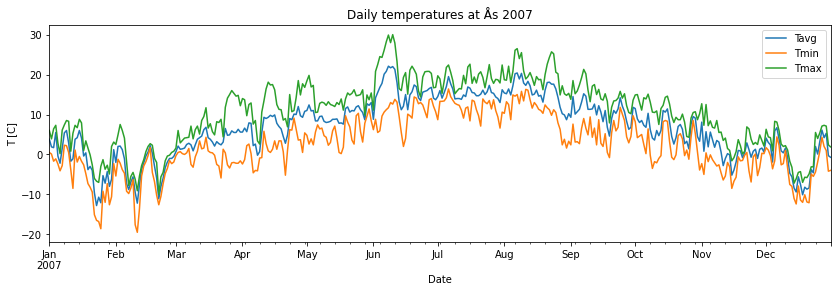

In [87]:
ax = w07.loc[:, 'Tavg':'Tmax'].plot(title='Daily temperatures at Ås 2007');
ax.set_ylabel('T [C]');

- Looks nice, doesn't it?
- Pandas also handles missing data nicely when plotting
    - Show as gaps in the plot

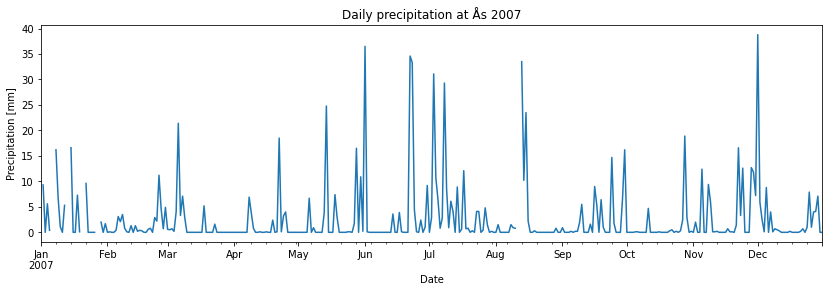

In [88]:
ax = w07.Rain.plot(title='Daily precipitation at Ås 2007');
ax.set_ylabel('Precipitation [mm]');

- We can select to plot only over certain intervals

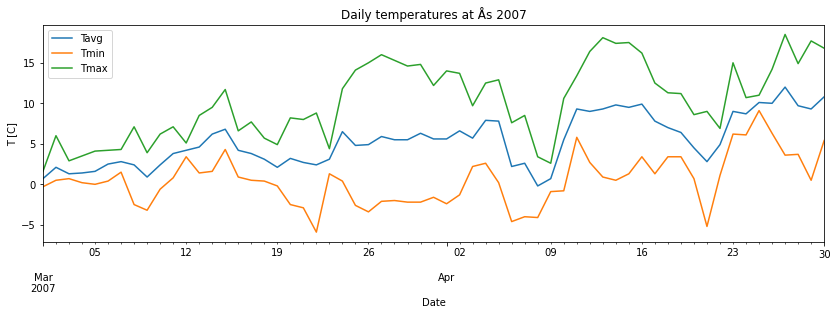

In [89]:
ax = w07.loc['Mar 2007':'Apr 2007', 'Tavg':'Tmax'].plot(title='Daily temperatures at Ås 2007');
ax.set_ylabel('T [C]');

### Resampling time series

- Pandas allows us to resample time series 
- See http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling
- We can specify a wide range of sampling *rules*, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
- We resample 3-day and monthly averages

In [97]:
w07_3d = w07.resample(rule='3D').mean()
w07_3d.head()

Tavg      Tmin      Tmax       Rain      RainM      Glob  \
Date                                                                       
2007-01-01  2.466667 -0.366667  5.433333   4.650000   4.650000  0.573333   
2007-01-04  0.966667 -2.533333  3.433333   3.000000   3.000000  0.743333   
2007-01-07  4.300000  0.566667  7.333333  11.500000  11.500000  0.270000   
2007-01-10  0.033333 -3.933333  4.800000   2.133333   2.133333  0.750000   
2007-01-13  4.666667 -0.433333  7.600000  16.600000  16.600000  1.100000   

                  UV       Gras  
Date                             
2007-01-01  5.730000  -5.700000  
2007-01-04  7.140000  -7.566667  
2007-01-07  6.996667  -1.900000  
2007-01-10  5.863333 -10.633333  
2007-01-13  5.423333  -4.333333

In [98]:
w07_m = w07.resample(rule='M').mean()
w07_m.head()

Tavg      Tmin       Tmax      Rain     RainM       Glob  \
Date                                                                        
2007-01-31  -1.432258 -5.648387   2.154839  3.727273  3.727273   1.123871   
2007-02-28  -3.589286 -6.300000  -1.282143  1.482143  1.845000   2.123929   
2007-03-31   3.654839 -0.512903   8.187097  1.532258  2.152174   7.322258   
2007-04-30   7.140000  1.570000  12.426667  1.333333  1.709091  13.618333   
2007-05-31  10.067742  5.500000  14.041935  2.454839  3.545455  14.925484   

                  UV       Gras  
Date                             
2007-01-31  6.165484 -11.161290  
2007-02-28  6.781429  -8.767857  
2007-03-31  5.023548  -5.129032  
2007-04-30  4.525000  -4.223333  
2007-05-31  4.926774   0.700000

- Notice the time stamps:
    - for 3-day, it is *first* day in each 3-day interval
    - for monthly, it is *last* day in each interval (month)
- This behavior is defined in Pandas, see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html
- We plot together with the original data
    - To combine several Pandas-plots in one coordinate system, we need to specify axes explicitly
    - We use `GridSpec` to create a 2:1 split of the figure (https://matplotlib.org/tutorials/intermediate/gridspec.html)

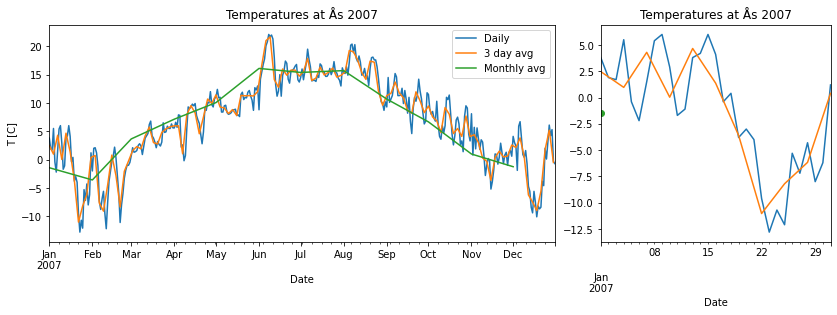

In [99]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# main plot
ax1 = fig.add_subplot(gs[0, :2])
w07.Tavg.plot(ax=ax1, label='Daily');
w07_3d.Tavg.plot(ax=ax1, label='3 day avg');
w07_m.Tavg.plot(ax=ax1, label='Monthly avg');
ax1.set_title('Temperatures at Ås 2007');
ax1.set_ylabel('T [C]');
ax1.legend();

# zoom into January
ax2 = fig.add_subplot(gs[0, 2])
w07.loc['Jan 2007'].Tavg.plot(ax=ax2, label='Daily');
w07_3d.loc['Jan 2007'].Tavg.plot(ax=ax2, label='3 day avg');
w07_m.loc['Jan 2007'].Tavg.plot(ax=ax2, marker='o', linestyle='-', label='Monthly avg');
ax2.set_title('Temperatures at Ås 2007');

- Note that averages are shifted to the left, should be shown centered in interval
- Need to adjust time stamps by specifying
    - 1 day offset for 3 day intervals
    - 15 days from left edge for monthly intervals

In [100]:
from pandas.tseries.frequencies import to_offset

w07_3d_o = w07.resample(rule='3D').mean()
w07_3d_o.index += to_offset('1D')
w07_3d_o.head()

Tavg      Tmin      Tmax       Rain      RainM      Glob  \
Date                                                                       
2007-01-02  2.466667 -0.366667  5.433333   4.650000   4.650000  0.573333   
2007-01-05  0.966667 -2.533333  3.433333   3.000000   3.000000  0.743333   
2007-01-08  4.300000  0.566667  7.333333  11.500000  11.500000  0.270000   
2007-01-11  0.033333 -3.933333  4.800000   2.133333   2.133333  0.750000   
2007-01-14  4.666667 -0.433333  7.600000  16.600000  16.600000  1.100000   

                  UV       Gras  
Date                             
2007-01-02  5.730000  -5.700000  
2007-01-05  7.140000  -7.566667  
2007-01-08  6.996667  -1.900000  
2007-01-11  5.863333 -10.633333  
2007-01-14  5.423333  -4.333333

In [101]:
w07_m_o = w07.resample(rule='M', label='left').mean()
w07_m_o.index += to_offset('15D')
w07_m_o.head()

Tavg      Tmin       Tmax      Rain     RainM       Glob  \
Date                                                                        
2007-01-15  -1.432258 -5.648387   2.154839  3.727273  3.727273   1.123871   
2007-02-15  -3.589286 -6.300000  -1.282143  1.482143  1.845000   2.123929   
2007-03-15   3.654839 -0.512903   8.187097  1.532258  2.152174   7.322258   
2007-04-15   7.140000  1.570000  12.426667  1.333333  1.709091  13.618333   
2007-05-15  10.067742  5.500000  14.041935  2.454839  3.545455  14.925484   

                  UV       Gras  
Date                             
2007-01-15  6.165484 -11.161290  
2007-02-15  6.781429  -8.767857  
2007-03-15  5.023548  -5.129032  
2007-04-15  4.525000  -4.223333  
2007-05-15  4.926774   0.700000

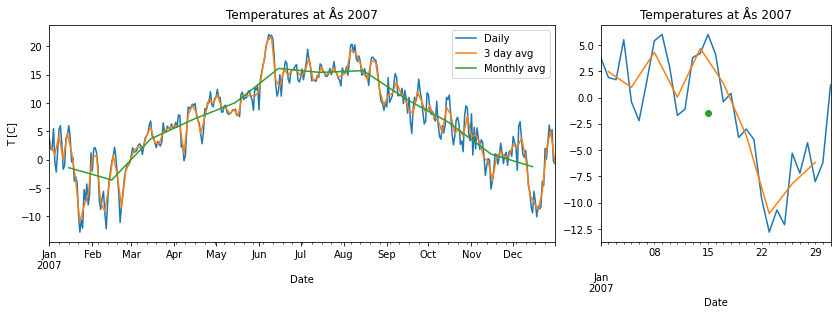

In [102]:
fig = plt.figure()
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# main plot
ax1 = fig.add_subplot(gs[0, :2])
w07.Tavg.plot(ax=ax1, label='Daily');
w07_3d_o.Tavg.plot(ax=ax1, label='3 day avg');
w07_m_o.Tavg.plot(ax=ax1, label='Monthly avg');
ax1.set_title('Temperatures at Ås 2007');
ax1.set_ylabel('T [C]');
ax1.legend();

# zoom into January
ax2 = fig.add_subplot(gs[0, 2])
w07.loc['Jan 2007'].Tavg.plot(ax=ax2, label='Daily');
w07_3d_o.loc['Jan 2007'].Tavg.plot(ax=ax2, label='3 day avg');
w07_m_o.loc['Jan 2007'].Tavg.plot(ax=ax2, marker='o', linestyle='-', label='Monthly avg');
ax2.set_title('Temperatures at Ås 2007');

- Looks much better

### Reading data from multiple sheets

- We can read data from multiple sheets at the same time
    - Returns dictionary mapping sheet names to sheet dataframes
    - We need only the dataframes
- Can combine them using `pd.concat()`
- We also set short column names (just in case the years got mixed up)

In [103]:
sheets = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name=['2007', '2008', '2009'])

In [104]:
w789 = pd.concat(sheets)
w789.columns = ['Date', 'Tavg', 'Tmin', 'Tmax', 'Rain', 'RainM', 'Glob', 'UV', 'Gras']
w789['Date'] = pd.DatetimeIndex(w789['Date'])
w789 = w789.set_index('Date')
w789.head()

Tavg  Tmin  Tmax  Rain  RainM  Glob     UV  Gras
Date                                                        
2007-01-01   3.8   0.5   6.0   NaN    NaN  0.37   6.12  -3.5
2007-01-02   1.9   0.1   3.9   9.3    9.3  0.65   5.30  -6.0
2007-01-03   1.7  -1.7   6.4   0.0    0.0  0.70   5.77  -7.6
2007-01-04   5.5  -1.1   7.3   5.6    5.6  0.38  10.23  -6.0
2007-01-05  -0.4  -2.4   2.8   0.4    0.4  0.94   4.88  -8.6

In [105]:
w789.describe()

Tavg         Tmin         Tmax         Rain       RainM  \
count  1096.000000  1096.000000  1096.000000  1065.000000  761.000000   
mean      6.607862     2.397273    10.371038     2.827380    3.975361   
std       7.625399     7.256392     8.458862     6.204579    8.596710   
min     -19.614170   -22.700000   -15.480000     0.000000    0.000000   
25%       1.095514    -2.117000     3.775000     0.000000    0.000000   
50%       6.449687     2.084000    10.600000     0.100000    0.200000   
75%      13.010210     8.300000    16.985000     2.800000    4.000000   
max      23.968680    16.400000    30.400000    49.200000   74.500000   

              Glob           UV        Gras  
count  1091.000000  1032.000000  1096.00000  
mean      9.157877     5.750847    -1.96430  
std       8.300364     1.624311     7.91426  
min       0.070000     3.214899   -30.46000  
25%       1.775000     4.600000    -6.90100  
50%       6.734967     5.239219    -1.64050  
75%      15.280805     6.514968     3.40000  
max      29.500000    17.200000    15.23000

- Let's check how many days we have per calendar week
- Should be 21 as we have data for three years

In [106]:
w789.groupby(w789.index.isocalendar().week).count().iloc[45:]

Tavg  Tmin  Tmax  Rain  RainM  Glob  UV  Gras
week                                               
46      22    22    22    22     16    22  15    22
47      21    21    21    21     15    21  20    21
48      21    21    21    21     13    21  19    21
49      14    14    14    12     10    14   7    14
50      17    17    17    15     11    17  10    17
51      21    21    21    19     15    21  14    21
52      21    21    21    17      7    21  14    21
53       4     4     4     3      3     4   4     4

- Why this error? It worked for 2007!
- Let's look at the years:

In [107]:
sheets['2007'].head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0 2007-01-01                      3.8                          0.5   
1 2007-01-02                      1.9                          0.1   
2 2007-01-03                      1.7                         -1.7   
3 2007-01-04                      5.5                         -1.1   
4 2007-01-05                     -0.4                         -2.4   

   Luft temperatur max ( ° C )  Nedbør (mm)  Nedbør manuell (mm )kl 8-8  \
0                          6.0          NaN                         NaN   
1                          3.9          9.3                         9.3   
2                          6.4          0.0                         0.0   
3                          7.3          5.6                         5.6   
4                          2.8          0.4                         0.4   

   GLOB(MJ/m2)  UV(MJ/m2)  Gras minimumstemperatur ( ° C )  
0         0.37       6.12                             -3.5  
1         0.65       5.30                             -6.0  
2         0.70       5.77                             -7.6  
3         0.38      10.23                             -6.0  
4         0.94       4.88                             -8.6

In [108]:
sheets['2008'].head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0  2008-01-01 00:00:00                     -1.1                         -2.5   
1  2008-01-02 00:00:00                      0.3                         -0.8   
2  2008-01-03 00:00:00                     -2.0                         -3.1   
3  2008-01-04 00:00:00                     -1.8                         -3.2   
4  2008-01-05 00:00:00                     -1.5                         -3.1   

   Luft temperatur max ( ° C )  Nedbør (mm)  Nedbør manuell (mm )kl 8-8  \
0                         -0.1          NaN                         NaN   
1                          1.3          0.8                         0.8   
2                         -0.8          0.5                         0.5   
3                         -0.8          0.7                         0.7   
4                         -0.9          NaN                         NaN   

   GLOB(MJ/m2)  UV(MJ/m2)  Gras minimumstemperatur ( ° C )  
0          0.4       11.1                             -3.0  
1          0.4       12.1                             -1.5  
2          0.7       10.7                             -4.4  
3          0.3       13.3                             -5.7  
4          0.1       14.3                             -3.6

In [109]:
sheets['2009'].head()

DATO  Luft temperatur ( ° C )  Luft temperatur min ( ° C )  \
0 2009-01-01 00:10:00                -8.184014                       -11.90   
1 2009-01-02 00:10:00               -10.036900                       -12.46   
2 2009-01-03 00:10:00                -6.306083                       -10.76   
3 2009-01-04 00:10:00               -11.571530                       -15.85   
4 2009-01-05 00:10:00               -11.687710                       -15.84   

   Luft temperatur max ( ° C )  Nedbør (mm)  Nedbør manuell (mm )kl 8-8  \
0                       -4.181          0.1                         0.5   
1                       -6.545          0.0                         NaN   
2                       -0.944          0.0                         NaN   
3                       -7.910          0.0                         NaN   
4                       -7.900          0.0                         0.1   

   GLOB(MJ/m2)  UV(MJ/m2)  Gras minimumstemperatur ( ° C )  
0     1.561710   3.214899                           -18.84  
1     1.478721   3.989191                           -19.07  
2     1.078208   5.226728                           -17.66  
3     1.813454   3.284119                           -22.08  
4     1.324798   5.213370                           -21.40

- 2008 and 2009 have different date formats than 2007
- Let's look at data types

In [110]:
sheets['2007'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATO                             365 non-null    datetime64[ns]
 1   Luft temperatur ( ° C )          365 non-null    float64       
 2   Luft temperatur min ( ° C )      365 non-null    float64       
 3   Luft temperatur max ( ° C )      365 non-null    float64       
 4   Nedbør (mm)                      354 non-null    float64       
 5   Nedbør manuell (mm )kl 8-8       268 non-null    float64       
 6   GLOB(MJ/m2)                      365 non-null    float64       
 7   UV(MJ/m2)                        315 non-null    float64       
 8   Gras minimumstemperatur ( ° C )  365 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.8 KB


In [111]:
sheets['2008'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DATO                             366 non-null    object 
 1   Luft temperatur ( ° C )          366 non-null    float64
 2   Luft temperatur min ( ° C )      366 non-null    float64
 3   Luft temperatur max ( ° C )      366 non-null    float64
 4   Nedbør (mm)                      357 non-null    float64
 5   Nedbør manuell (mm )kl 8-8       248 non-null    float64
 6   GLOB(MJ/m2)                      361 non-null    float64
 7   UV(MJ/m2)                        352 non-null    float64
 8   Gras minimumstemperatur ( ° C )  366 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.9+ KB


- `DATO` in 2007 is `datetime64[ns]`, while in 2008 it is just some `object`
- Need to look at `xlsx` file if we can spot some difference
    - 2008 sheet shows "Date" formatted date cells until 30 Nov, then "General" cells (string)
    - We need to force conversion to `Timestamp`

In [112]:
sheets = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name=['2007', '2008', '2009'], 
                       converters={'DATO': lambda cell: pd.Timestamp(cell)})

In [113]:
w789 = pd.concat(sheets)
w789.columns = ['Date', 'Tavg', 'Tmin', 'Tmax', 'Rain', 'RainM', 'Glob', 'UV', 'Gras']
w789 = w789.set_index('Date')
w789.sort_index()
w789.head()

Tavg  Tmin  Tmax  Rain  RainM  Glob     UV  Gras
Date                                                        
2007-01-01   3.8   0.5   6.0   NaN    NaN  0.37   6.12  -3.5
2007-01-02   1.9   0.1   3.9   9.3    9.3  0.65   5.30  -6.0
2007-01-03   1.7  -1.7   6.4   0.0    0.0  0.70   5.77  -7.6
2007-01-04   5.5  -1.1   7.3   5.6    5.6  0.38  10.23  -6.0
2007-01-05  -0.4  -2.4   2.8   0.4    0.4  0.94   4.88  -8.6

In [114]:
w789.index.isocalendar().week.value_counts().sort_index()

1     21
2     22
3     21
4     21
5     21
6     21
7     22
8     21
9     21
10    21
11    22
12    21
13    21
14    21
15    22
16    21
17    21
18    21
19    21
20    22
21    21
22    21
23    21
24    22
25    21
26    21
27    21
28    22
29    21
30    21
31    21
32    21
33    22
34    21
35    21
36    21
37    22
38    21
39    21
40    21
41    22
42    21
43    21
44    21
45    21
46    22
47    21
48    21
49    14
50    17
51    21
52    21
53     4
Name: week, dtype: Int64

- This looks strange
    - Several calendar weeks occur 22 times
    - Weeks 49 and 50 only 14 and 17 times
- Look more closely at week 49, year by year

In [115]:
u49 = w789.loc[w789.index.isocalendar().week==49]
u49.groupby(u49.index.year).count()

Tavg  Tmin  Tmax  Rain  RainM  Glob  UV  Gras
Date                                               
2007     7     7     7     7      5     7   0     7
2009     7     7     7     5      5     7   7     7

- No week 49 in 2008?!
- Let's check week 50

In [116]:
u50 = w789.loc[w789.index.isocalendar().week==50]
u50.groupby(u50.index.year).count()

Tavg  Tmin  Tmax  Rain  RainM  Glob  UV  Gras
Date                                               
2007     7     7     7     7      5     7   0     7
2008     3     3     3     3      1     3   3     3
2009     7     7     7     5      5     7   7     7

- We have week 50 in 2008, but just three days!
- Let's look at week 50

In [117]:
w789.loc[(w789.index.isocalendar().week==50) & (w789.index.isocalendar().year==2008)]

Tavg  Tmin  Tmax  Rain  RainM  Glob    UV  Gras
Date                                                       
2008-12-12  -3.1  -8.2  -2.4   0.0    0.1  0.57  6.91 -14.4
2008-12-13  -2.5  -9.0   0.2   0.1    NaN  0.60  6.42 -15.6
2008-12-14  -0.1  -2.7   1.3   1.4    NaN  0.20  8.75  -2.9

- The early days are missing!
- Another case of the US-date problem?
- Let's check week 46, which had a day to many

In [118]:
w789.loc[(w789.index.isocalendar().week==46) & (w789.index.isocalendar().year==2008)]

Tavg  Tmin  Tmax  Rain  RainM  Glob    UV  Gras
Date                                                       
2008-11-10   6.1   3.8   7.5  22.4   40.2  1.70  5.00  -1.0
2008-11-11   3.5   2.0   4.2   2.5    5.0  0.90  7.00  -0.5
2008-11-12   1.9  -1.3   3.5   3.9    6.3  1.60  5.30  -7.3
2008-11-13  -1.5  -4.8   2.5   0.2    0.4  2.90  4.50 -11.4
2008-11-14   4.0  -0.4   7.8  14.5   14.0  1.80  5.50  -0.8
2008-11-15   7.6   4.1   9.7   0.2    NaN  2.50  4.80  -2.9
2008-11-16   3.6  -3.1   6.5   0.0    NaN  1.90  4.60 -10.6
2008-11-12  -2.7  -4.9  -1.8   0.0    0.1  0.53  6.64  -8.7

- Indeed: two times 12 November!
- Problem is that December dates are read as string, and then US convention rules ...
- Let's see what data types our converter gets in

In [119]:
s = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name=['2008'], 
                  converters={'DATO': lambda cell: type(cell)})['2008']

In [120]:
set(s.DATO)

{datetime.datetime, str}

In [121]:
s.DATO[:3]

0    <class 'datetime.datetime'>
1    <class 'datetime.datetime'>
2    <class 'datetime.datetime'>
Name: DATO, dtype: object

In [122]:
s.DATO[-3:]

363    <class 'str'>
364    <class 'str'>
365    <class 'str'>
Name: DATO, dtype: object

- `datetime.datetime` for the Excel "Date" cells, then `str`
- Improve converter

In [123]:
import datetime
sheets = pd.read_excel('Aas dogn 2003-2012.xlsx', sheet_name=['2007', '2008', '2009'], 
                       converters={'DATO': 
                                   lambda cell: pd.Timestamp(cell if isinstance(cell, datetime.datetime)
                                                else pd.to_datetime(cell, dayfirst=True))})

In [124]:
w789 = pd.concat(sheets)
w789.columns = ['Date', 'Tavg', 'Tmin', 'Tmax', 'Rain', 'RainM', 'Glob', 'UV', 'Gras']
w789 = w789.set_index('Date')
w789.sort_index(inplace=True)

In [125]:
u50 = w789.loc[w789.index.isocalendar().week==49]
u50.groupby(u50.index.year).count()

Tavg  Tmin  Tmax  Rain  RainM  Glob  UV  Gras
Date                                               
2007     7     7     7     7      5     7   0     7
2008     7     7     7     7      5     7   7     7
2009     7     7     7     5      5     7   7     7

Now we have week 49 also in 2008!

### Plotting several years

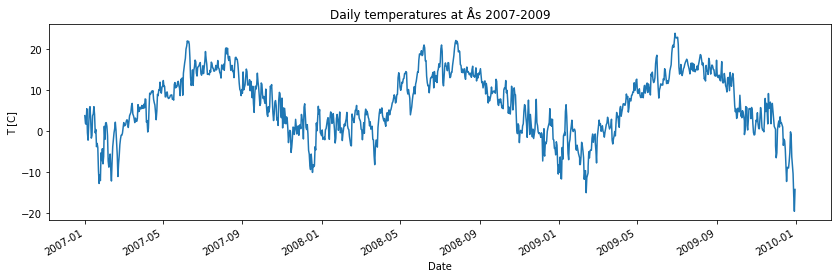

In [126]:
ax = w789.Tavg.plot(title='Daily temperatures at Ås 2007-2009');
ax.set_ylabel('T [C]');

#### Plotting years on top of each other

- Add columns for day within year and year
- Create *pivot table*, indexing by day of year for each year
- See also https://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [127]:
w789['doy'] = w789.index.dayofyear
w789['year'] = w789.index.year

In [128]:
p789 = pd.pivot_table(w789, index=['doy'], columns=['year'])

In [129]:
p789.head()

Glob                Gras             Rain           RainM  ...  \
year  2007 2008      2009 2007 2008   2009 2007 2008 2009  2007  ...   
doy                                                              ...   
1     0.37  0.4  1.561710 -3.5 -3.0 -18.84  NaN  NaN  0.1   NaN  ...   
2     0.65  0.4  1.478721 -6.0 -1.5 -19.07  9.3  0.8  0.0   9.3  ...   
3     0.70  0.7  1.078208 -7.6 -4.4 -17.66  0.0  0.5  0.0   0.0  ...   
4     0.38  0.3  1.813454 -6.0 -5.7 -22.08  5.6  0.7  0.0   5.6  ...   
5     0.94  0.1  1.324798 -8.6 -3.6 -21.40  0.4  NaN  0.0   0.4  ...   

           Tavg Tmax             Tmin                 UV                  
year       2009 2007 2008   2009 2007 2008   2009   2007  2008      2009  
doy                                                                       
1     -8.184014  6.0 -0.1 -4.181  0.5 -2.5 -11.90   6.12  11.1  3.214899  
2    -10.036900  3.9  1.3 -6.545  0.1 -0.8 -12.46   5.30  12.1  3.989191  
3     -6.306083  6.4 -0.8 -0.944 -1.7 -3.1 -10.76   5.77  10.7  5.226728  
4    -11.571530  7.3 -0.8 -7.910 -1.1 -3.2 -15.85  10.23  13.3  3.284119  
5    -11.687710  2.8 -0.9 -7.900 -2.4 -3.1 -15.84   4.88  14.3  5.213370  

[5 rows x 24 columns]

In [130]:
p789.columns

MultiIndex([( 'Glob', 2007),
            ( 'Glob', 2008),
            ( 'Glob', 2009),
            ( 'Gras', 2007),
            ( 'Gras', 2008),
            ( 'Gras', 2009),
            ( 'Rain', 2007),
            ( 'Rain', 2008),
            ( 'Rain', 2009),
            ('RainM', 2007),
            ('RainM', 2008),
            ('RainM', 2009),
            ( 'Tavg', 2007),
            ( 'Tavg', 2008),
            ( 'Tavg', 2009),
            ( 'Tmax', 2007),
            ( 'Tmax', 2008),
            ( 'Tmax', 2009),
            ( 'Tmin', 2007),
            ( 'Tmin', 2008),
            ( 'Tmin', 2009),
            (   'UV', 2007),
            (   'UV', 2008),
            (   'UV', 2009)],
           names=[None, 'year'])

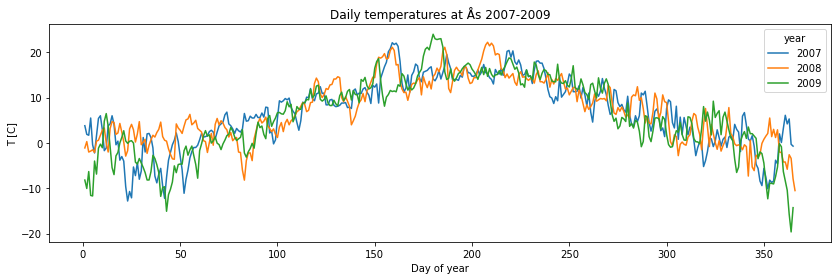

In [131]:
ax = p789.Tavg.plot(title='Daily temperatures at Ås 2007-2009');
ax.set_ylabel('T [C]');
ax.set_xlabel('Day of year');

- Can we add months on x-axis instead of day numbers?
- Need to manually set tick locators and formatter
- Since the date now is given as day number, we need to place ticks along the x-axis manually
    - We place them at the 15th of each month
    - https://matplotlib.org/api/ticker_api.html, https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html
- Then we can use the formatter from `matplotlib.dates` (https://matplotlib.org/api/dates_api.html)

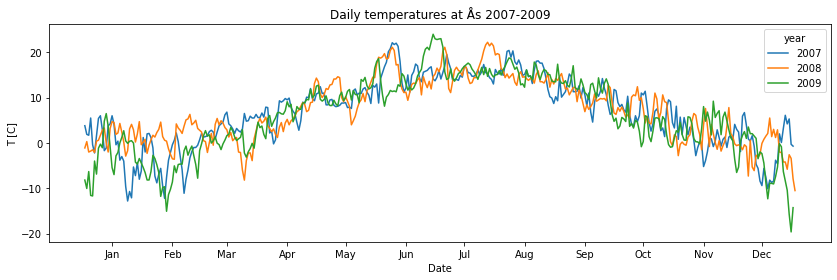

In [132]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

ax = p789.Tavg.plot(title='Daily temperatures at Ås 2007-2009');
ax.set_xlabel('Date');
ax.set_ylabel('T [C]');
ax.xaxis.set_major_locator(ticker.FixedLocator(15+np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])));
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

- There is still a subtle problem with this figure—what?